In [1]:
import pyspark
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
from pyspark.sql.functions import count, desc, col
from matplotlib.pyplot import figure


In [3]:
spark = SparkSession.builder.master("local").appName("hdfs_test").getOrCreate()

/home/hduser/.local/lib/python2.7/site-packages/pyspark/context.py:227: DeprecationWarning: Support for Python 2 and Python 3 prior to version 3.6 is deprecated as of Spark 3.0. See also the plan for dropping Python 2 support at https://spark.apache.org/news/plan-for-dropping-python-2-support.html.
  DeprecationWarning)


In [4]:
fileSchema = StructType().add("Head","string")\
.add("Predicate","string")\
.add("Tail","string")


In [18]:
df1 = spark.read.csv("hdfs://hadoop1:54310/user/yago-facts.tsv",sep='\t' ,schema = fileSchema)


In [6]:
df1.show()

+--------------------+-----------------+--------------------+
|                Head|        Predicate|                Tail|
+--------------------+-----------------+--------------------+
|       <Goo_(album)>|<copyrightHolder>|  <Raymond_Pettibon>|
|           <Libtiff>|<copyrightHolder>|  <Silicon_Graphics>|
|<Wendy_the_Good_L...|<copyrightHolder>|<Paramount_Pictures>|
|         <Windows_7>|<copyrightHolder>|         <Microsoft>|
|<Freaks_(1932_film)>|<copyrightHolder>|<Metro-Goldwyn-Ma...|
|       <The_Plowboy>|<copyrightHolder>|<The_Walt_Disney_...|
|      <Sandy_Cheeks>|<copyrightHolder>|<Viacom_(2005–2019)>|
|         <A_esmorga>|<copyrightHolder>| <Editorial_Galaxia>|
|<Ma_Jolie_(Picass...|<copyrightHolder>|<Artists_Rights_S...|
|<Tempest_(video_g...|<copyrightHolder>|       <Atari,_Inc.>|
|             <MacOS>|<copyrightHolder>|        <Apple_Inc.>|
|<Oswald_the_Lucky...|<copyrightHolder>|<Universal_Pictures>|
|<Casper_the_Frien...|<copyrightHolder>|<Paramount_Pictures>|
|     <Y

In [35]:
fileSchema1 = StructType().add("Entity","string")\
.add("Predicate","string")\
.add("Type","string")


In [36]:
df2 = spark.read.csv("hdfs://hadoop1:54310/user/yago-full-types.tsv",sep='\t' ,schema = fileSchema1)
df2.show()

+--------------------+---------+--------------------+
|              Entity|Predicate|                Type|
+--------------------+---------+--------------------+
| <Harald_Ringstorff>|   <type>|             <Human>|
|      <Ecclesiastes>|   <type>|    <Religious_text>|
|      <Ecclesiastes>|   <type>|              <Book>|
|        <Gao_Jingde>|   <type>|             <Human>|
|           <Messeix>|   <type>|<Communes_of_France>|
|  <Varena,_Trentino>|   <type>|            <Comune>|
|  <Varena,_Trentino>|   <type>|<AdministrativeArea>|
|  <Varena,_Trentino>|   <type>|       <Corporation>|
|     <Aggiornamento>|   <type>|             <Thing>|
|       <Ewa_Fröling>|   <type>|             <Human>|
|<Acoustic_Live_(E...|   <type>|        <Live_album>|
|  <Gustavia_superba>|   <type>|<http://bioschema...|
|      <Ronny_Hafsås>|   <type>|             <Human>|
|<ACI_Vallelunga_C...|   <type>|        <Race_track>|
|            <Bunkka>|   <type>|        <MusicAlbum>|
|   <Brinkman_number>|   <ty

In [21]:
uniondf=df1.union(df2)
uniondf.show()

+--------------------+-----------------+--------------------+
|                Head|        Predicate|                Tail|
+--------------------+-----------------+--------------------+
|       <Goo_(album)>|<copyrightHolder>|  <Raymond_Pettibon>|
|           <Libtiff>|<copyrightHolder>|  <Silicon_Graphics>|
|<Wendy_the_Good_L...|<copyrightHolder>|<Paramount_Pictures>|
|         <Windows_7>|<copyrightHolder>|         <Microsoft>|
|<Freaks_(1932_film)>|<copyrightHolder>|<Metro-Goldwyn-Ma...|
|       <The_Plowboy>|<copyrightHolder>|<The_Walt_Disney_...|
|      <Sandy_Cheeks>|<copyrightHolder>|<Viacom_(2005–2019)>|
|         <A_esmorga>|<copyrightHolder>| <Editorial_Galaxia>|
|<Ma_Jolie_(Picass...|<copyrightHolder>|<Artists_Rights_S...|
|<Tempest_(video_g...|<copyrightHolder>|       <Atari,_Inc.>|
|             <MacOS>|<copyrightHolder>|        <Apple_Inc.>|
|<Oswald_the_Lucky...|<copyrightHolder>|<Universal_Pictures>|
|<Casper_the_Frien...|<copyrightHolder>|<Paramount_Pictures>|
|     <Y

In [22]:
uniondf.select(count('Head'),count('Predicate'),count('Tail')).collect()


[Row(count(Head)=28075025, count(Predicate)=28075025, count(Tail)=28075023)]

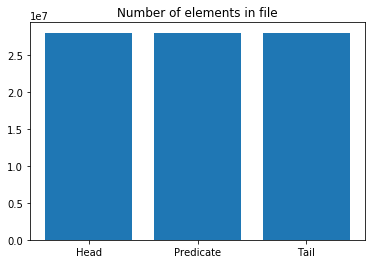

In [23]:
df3 = pd.DataFrame({
    'Column':['Head','Predicate','Tail'],
    'Total':[28075025,28075025,28075023]
})
plt.bar(df3["Column"], df3["Total"])
plt.title("Number of elements in file")
plt.show()

In [27]:
df2.groupBy('Tail').count().sort(desc('count')).show(10)


+--------------------+-------+
|                Tail|  count|
+--------------------+-------+
|             <Human>|1691127|
|<http://bioschema...| 402482|
|<AdministrativeArea>| 210851|
|             <Movie>| 136646|
|  <Human_settlement>| 116940|
|             <Thing>| 111788|
|        <MusicAlbum>| 111501|
|           <Village>|  88749|
|      <CreativeWork>|  83343|
|   <Season_(sports)>|  76863|
+--------------------+-------+
only showing top 10 rows



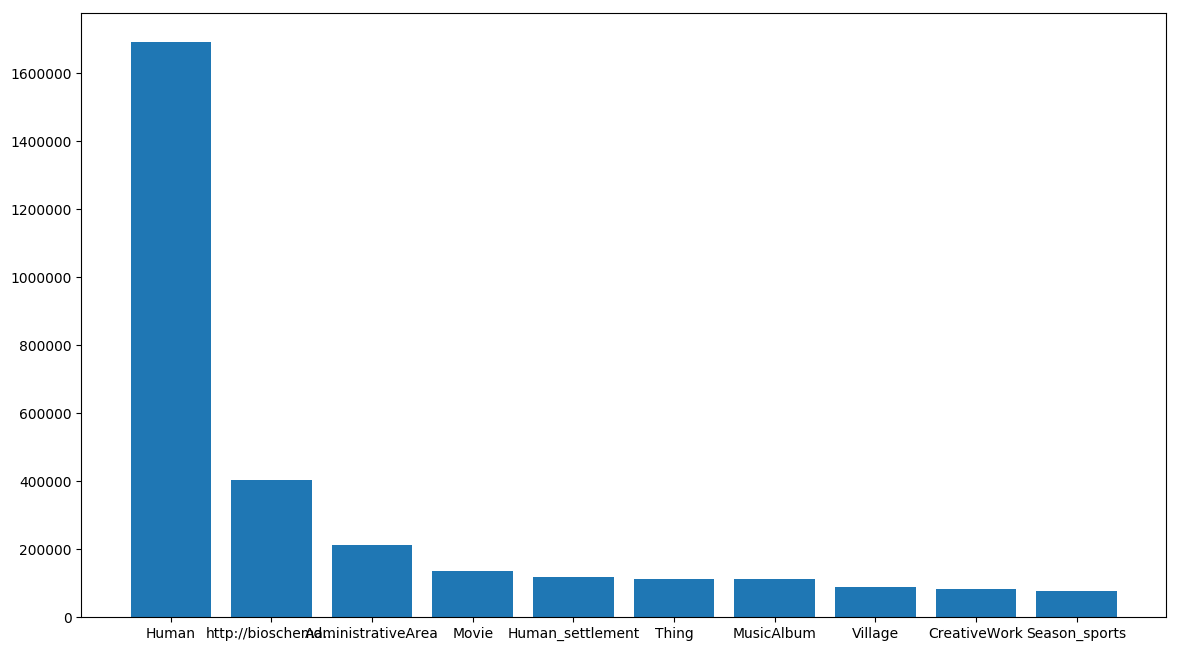

In [28]:
df4 = pd.DataFrame({
    'Column':['Human','http://bioschema...','AdministrativeArea','Movie','Human_settlement','Thing','MusicAlbum','Village','CreativeWork','Season_sports'],
    'Total':[1691127,402482,210851,136646,116940,111788,111501,88749,83343,76863]
})
plt.figure(figsize=(14,8), dpi = 100)
plt.bar(df4['Column'],df4['Total'])
plt.show()

In [30]:
di = df1.filter(df1.Predicate.like("%director%"))


In [31]:
di.groupBy('Tail').count().sort(desc('count')).show(10)

+------------------+-----+
|              Tail|count|
+------------------+-----+
|  <D._W._Griffith>|  307|
|     <Trey_Parker>|  266|
|    <Friz_Freleng>|  242|
|     <Chuck_Jones>|  237|
|   <Pamela_Fryman>|  194|
|<William_Beaudine>|  180|
|    <Sam_Newfield>|  179|
|  <Michael_Curtiz>|  171|
| <Robert_McKimson>|  167|
|   <Sidney_Olcott>|  166|
+------------------+-----+
only showing top 10 rows



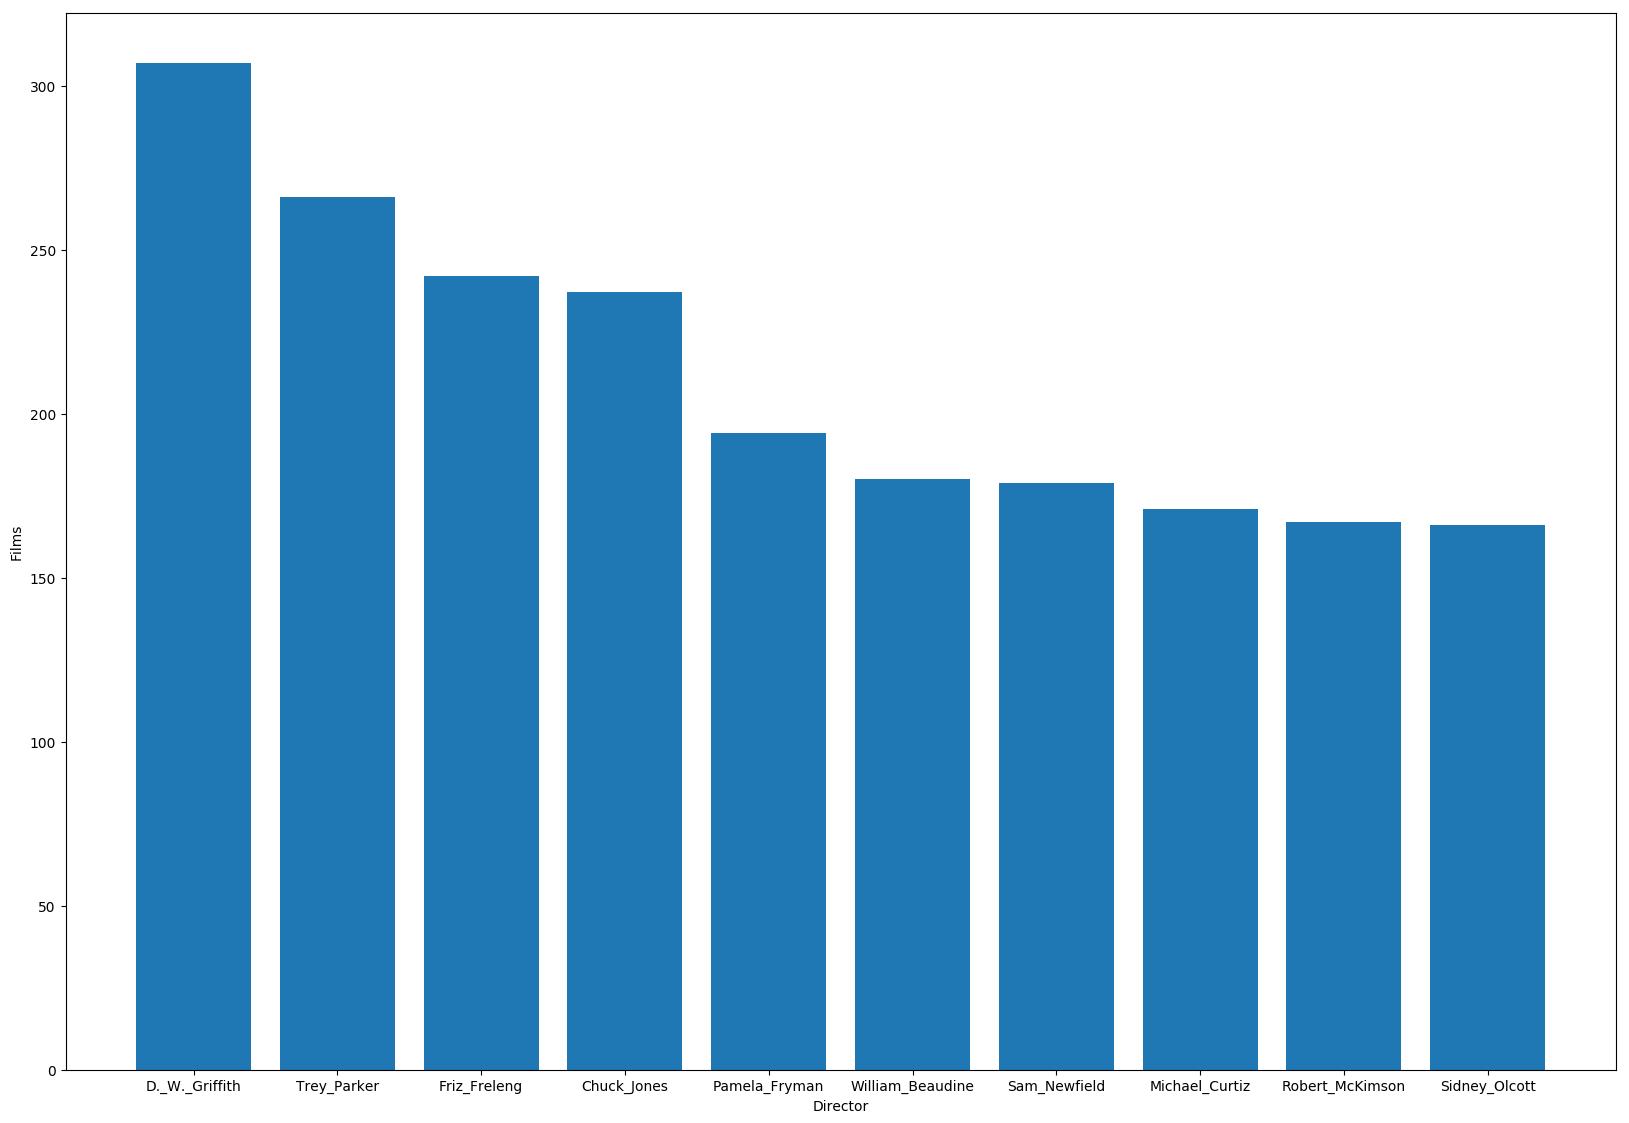

In [34]:
df5 = pd.DataFrame({
    'Column':['D._W._Griffith','Trey_Parker','Friz_Freleng','Chuck_Jones','Pamela_Fryman','William_Beaudine','Sam_Newfield','Michael_Curtiz','Robert_McKimson','Sidney_Olcott'],
    'Total':[307,266,242,237,194,180,179,171,167,166]
})
plt.figure(figsize=(20,14), dpi = 100)
plt.bar(df5['Column'],df5['Total'])
plt.ylabel('Films')
plt.xlabel('Director')
plt.show()

In [39]:
join1 = df1.alias("a").join(df2.alias("b"),df1["Head"]==df2["Entity"]).select(col("a.Head").alias("Head-Types"),"a.Predicate","a.Tail")
join1.show()

+--------------------+------------------+--------------------+
|          Head-Types|         Predicate|                Tail|
+--------------------+------------------+--------------------+
|<%3F_and_the_Myst...|           <genre>|       <Garage_rock>|
|<%3F_and_the_Myst...|             <url>|http://96tears.ne...|
|<%3F_and_the_Myst...|    <foundingDate>|1962^^<http://www...|
|<%3F_and_the_Myst...|<foundingLocation>|   <Flint,_Michigan>|
|<%60Adaylou_(dist...|             <geo>|<geo:11.960277777...|
|   <(9948)_1990_QB2>|           <image>|<http://commons.w...|
|<(Can't_Live_With...|        <isPartOf>|<After_the_Rain_(...|
|<(Can't_Live_With...|           <genre>|         <Hard_rock>|
|<(Can't_Live_With...|   <datePublished>|1990-05-19^^<http...|
|          <(a)spera>|      <inLanguage>|  <English_language>|
|          <(a)spera>|   <datePublished>|2009-03-10^^<http...|
|<...And_Justice_f...|        <isPartOf>|<...And_Justice_f...|
|<...And_Justice_f...|        <isPartOf>|<...And_Justic

In [46]:
join2 = join1.alias("a").join(df2.alias("b"),join1["Tail"]==df2["Entity"])
join2.show()

+--------------------+------------+--------------------+--------------------+---------+--------------------+
|          Head-Types|   Predicate|                Tail|              Entity|Predicate|                Type|
+--------------------+------------+--------------------+--------------------+---------+--------------------+
|       <More_Action>|  <byArtist>|<%3F_and_the_Myst...|<%3F_and_the_Myst...|   <type>|        <MusicGroup>|
|<Question_Mark_&_...|  <byArtist>|<%3F_and_the_Myst...|<%3F_and_the_Myst...|   <type>|        <MusicGroup>|
|  <96_Tears_(album)>|  <byArtist>|<%3F_and_the_Myst...|<%3F_and_the_Myst...|   <type>|        <MusicGroup>|
|<Action_(Question...|  <byArtist>|<%3F_and_the_Myst...|<%3F_and_the_Myst...|   <type>|        <MusicGroup>|
|<How_About_You_(S...|  <isPartOf>| <14_Shades_of_Grey>| <14_Shades_of_Grey>|   <type>|        <MusicAlbum>|
|<So_Far_Away_(Sta...|  <isPartOf>| <14_Shades_of_Grey>| <14_Shades_of_Grey>|   <type>|        <MusicAlbum>|
|     <Price_to_Pla